In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("../cleaned_datasets/cleaned_news.csv")
df

,text,label
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1
...,...,...
57671,for the first time in more than a decade impor...,1
57672,says donald trump has bankrupted his companies...,1
57673,john mccain and george bush have absolutely no...,1
57674,a new poll shows 62 percent support the presid...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57676 entries, 0 to 57675
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    57676 non-null  object
 1   label   57676 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 901.3+ KB


In [4]:
df.describe()

,label
count,57676.000000
mean,0.495024
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.isna().sum()

text     0
label    0
dtype: int64

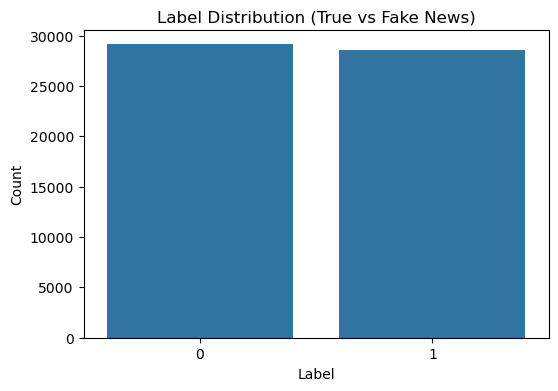

In [6]:
# Plot label distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title("Label Distribution (True vs Fake News)")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

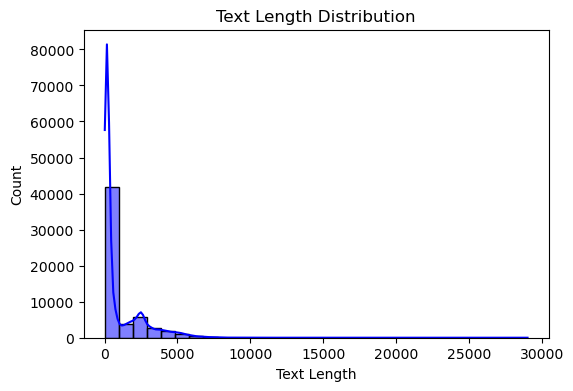

In [7]:
# Plot text length distribution
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], kde=True, color='blue', bins=30)
plt.title("Text Length Distribution")
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

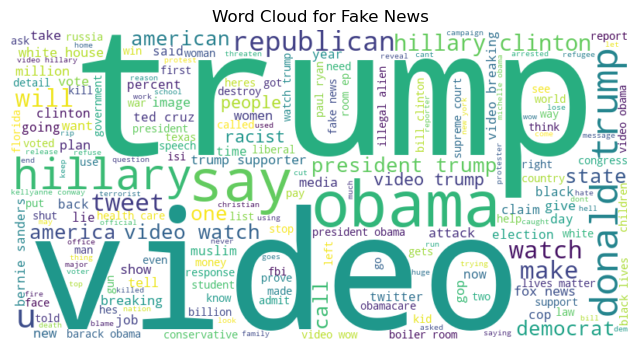

In [8]:
# Word cloud for the 'fake' news
fake_news_text = " ".join(df[df['label'] == 0]['text'])
plt.figure(figsize=(8, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Word Cloud for Fake News")
plt.axis('off')
plt.show()

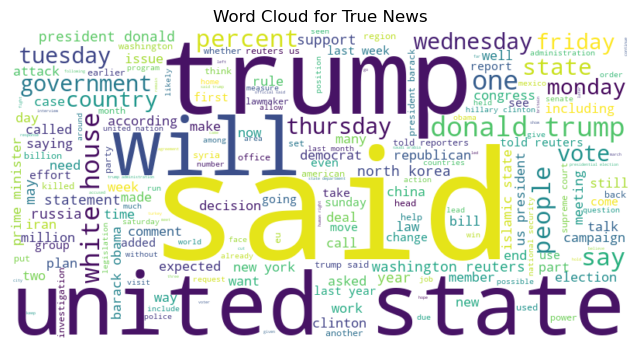

In [9]:
# Word cloud for the 'true' news
true_news_text = " ".join(df[df['label'] == 1]['text'])
plt.figure(figsize=(8, 6))
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_news_text)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title("Word Cloud for True News")
plt.axis('off')
plt.show()